# 의사결정 트리
* 주로 하향식 기법이 사용되며, 각 진행 단계에서는 주어진 데이터 집합을 가장 적합한 기준으로 분할하는 변수값이 선택된다.
* 분할의 적합성을 측정하는 알고리즘에 따라 ID3, C4.5(C5.0), CART, CHAID 등의 기법이 있다.

* 데이터를 어떻게 분할하고 데이터 분할을 언제 멈추어야 하는지에 대한 내용이 기본전제 되어 있다.

### 장점 
 * 학습결과를 사람이 이해하기 쉽다.
 * 자료를 가공할 필요가 거의 없다.
 * 관련없는 속성이 있어도 처리 가능하다.

### 단점
 * Overfitting 되기 쉽다.
 * 훈련데이터를 제대로 일반화 하지 못하면 복잡한 트리가 만들어 질수도 있다.
---

### 알고리즘 종류
ID3 알고리즘 ( Entropy / 다지분리(범주))
 - 범주형에 주로 이용 ( Entropy 기반 수식이 범주형에만 적용하기 때문)
 - 상위 노드에 사용된 속성은 사용하지 않음.
 - 연속(수치)형 속성은 사용할 수 없음.
 - 범주 값이 많은 경우 가지 갯수가 많아짐
 - [참고 사이트](http://jihoonlee.tistory.com/16?category=725291)
---
C4.5 알고리즘 ( Infomation Gain / 다지분리(범주), 이진분리(수치) )
 - ID3 알고리즘의 단점을 보완한 알고리즘
 - 수치형 속성 처리 가능
 - 결측치 처리 가능
 - 속성 선택시 Branch 수에 대한 가중치 적용 가능
 - 가지치기 기능 추가
 - [참고 사이트](http://jihoonlee.tistory.com/17?category=725291)
---
CART 알고리즘 ( GINI Index(범주), 분산의 차이(수치) / 항상 2진 분리, 통계적 접근 방식 )
 - 전체 데이터 셋을 가지고 시작
 - 반복해서 두개의 자식노드를 생성하기 위해
   모든 예측변수를 사용하여
   데이터 셋의 부분 집합을 쪼갬으로써 의사결정 트리 생성
---
CHAID 알고리즘 ( 카이제곱(범주), F검정(수치) / 통계적 접근 방식)
 - CART 알고리즘과 흡사하나 데이터 분할 방식이 다름.
 - 변수들 간의 통계적 관계를 찾는것이 목적
---
#### 엔트로피 및 지니 계수 계산은 참고 사이트 부분 확인

In [72]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
# ID3 알고리즘 코드 구현

from math import log

# 데이터 셋 만드는 부분
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

# Entropy 계산 하는 부분.
def calcShannonEnt(dataSet):
    numEntries = len(dataSet) # 전체의 데이터 갯수
    labelCnt = {}
    
    # 딕셔너리 생성.
    for featvec in dataSet:
        curlab = featvec[-1] 
        if curlab not in labelCnt.keys():
            labelCnt[curlab] = 0
        labelCnt[curlab] += 1   # 키의 빈도
        
    shannonEnt = 0
    for k in labelCnt.values():
        prob = float(k) / numEntries  # 확률 계산
        shannonEnt -= prob * log(prob, 2)  # ShanonEntropy 계산  : -시그마( 확률 * log2(확률))
    return shannonEnt

# DataSet 분할
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
#         print("{}\n{}/{}/{}".format(featVec,featVec[:axis], featVec[axis], featVec[axis+1:]))
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [59]:
myData, labels = createDataSet()

In [60]:
myData
labels

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

['no surfacing', 'flippers']

In [5]:
calcShannonEnt(myData)

0.9709505944546686

In [6]:
splitDataSet(myData, 1, 1)

[1, 1, 'yes']
[1]/1/['yes']
[1, 1, 'yes']
[1]/1/['yes']
[1, 0, 'no']
[1]/0/['no']
[0, 1, 'no']
[0]/1/['no']
[0, 1, 'no']
[0]/1/['no']


[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [40]:
# 최적의 분할 Feature 찾기
# 최적의 분할은 분할 전 엔트로피 - 분할 후 엔트로피 의 차이가 큰 Feature 라고 보면 됨. 
# 이것을 Infomation Gain 
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
#     print("*Base Ent : ", baseEntropy)
    bestInfoGain = 0.0
    bestFeature = -1
    
    for i in range(numFeatures):
        featList = [ex[i] for ex in dataSet]
#         print(featList)
        uniqueVals = set(featList)
#         print("U",uniqueVals)
        newEnt = 0.0
        for val in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, val)
#             print(subDataSet)
            prob = len(subDataSet)/float(len(dataSet))
#             print("Prob",prob)
            newEnt += prob * calcShannonEnt(subDataSet)
#             print("NewEnt : ",newEnt)
        infoGain = baseEntropy - newEnt
#         print("* infoG: ",infoGain)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [41]:
myData
chooseBestFeatureToSplit(myData)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

0

In [42]:
# 가장 빈도수가 많은 항목 찾기
def majorityCnt(classList):
    classCnt = {}
    for v in classList:
        if v not in classCnt.keys():
            classCnt[v] = 0
        classCnt[v] += 1
    sortedClassCnt = sorted(classCnt.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCnt[0][0]

In [67]:
def createTree(dataSet, labels):
    classList = [e[-1] for e in dataSet]
    # 같은 등급의 class 인 경우 멈춤. Leaf 
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 속성이 더 없으면 가장 많은 수를 반환.
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
#     print(labels)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    
    myTree = {bestFeatLabel:{}} # 트리 구조 쌓기 위함.
    del(labels[bestFeat]) # 사용된 속성은 삭제
    
    featValues = [ex[bestFeat] for ex in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels) # 재귀적으로 호출.
    
    return myTree

In [68]:
myData, labels = createDataSet()
myTree = createTree(myData, labels)
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


## 트리구조 그리기(미완)

In [1]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle = "sawtooth", fc="0.8")
leafNode = dict(boxstyle = "round4", fc ="0.8")
arrow_args = dict(arrowstyle = "<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = "axes fraction", xytext=centerPt, textcoords="axes fraction", va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
    
def createPlot():
    fig = plt.figure(1, facecolor="white")
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode("a decision node", (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode("a leaf node", (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

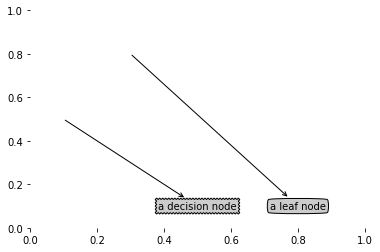

In [2]:
createPlot()